# Basic test

##### TODO: Delete or adapt the name and contents of this notebook

Tests the basic model defined in the `ContinuousModel` directory, instantiating bees, hives and resources

In [24]:
# Allows to make changes to the classes without restarting the notebook 💀 # TODO: Delete once done
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from src.model.agents.Hive import Hive
from src.model.agents.BeeSwarm import BeeSwarm
from src.model.agents.Resource import Resource
from src.model.Model import ForagerModel

from src.model.config.HiveConfig import HiveConfig
from src.model.config.BeeSwarmConfig import BeeSwarmConfig
from src.model.config.ResourceConfig import ResourceConfig
from src.model.config.ModelConfig import ModelConfig

from src.model.util.BeeState import BeeState
import src.model.util.ModelBuilder as ModelBuilder

In [2]:
import mesa
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, expon

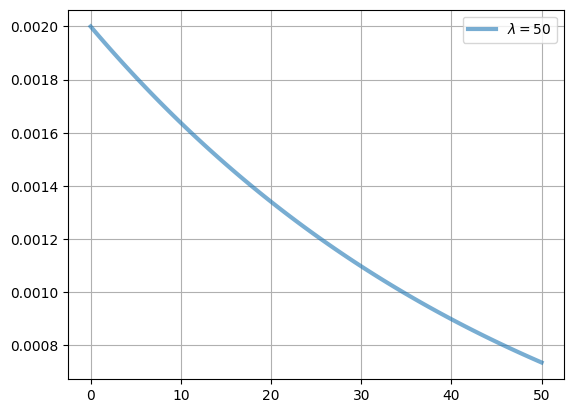

In [5]:
lambdas = [50]

for lam in lambdas:
    x = np.linspace(0, 50, 100)
    plt.plot(x, 0.1 * expon.pdf(x, scale=lam), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')


plt.legend()
plt.grid()
plt.show()

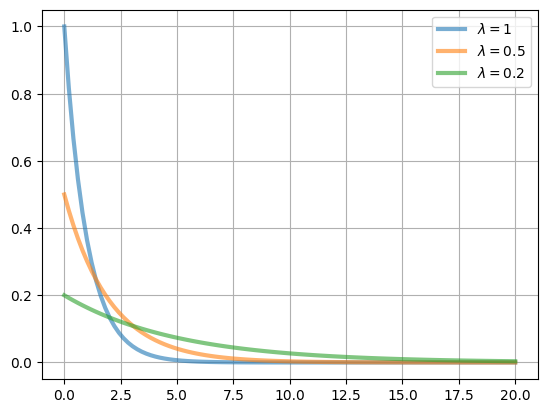

In [28]:
lambdas = [1, 0.5, 0.2]

for lam in lambdas:
    x = np.linspace(0, 20, 100)
    plt.plot(x, expon.pdf(x, scale=1/lam), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')

plt.legend()
plt.grid()
plt.show()

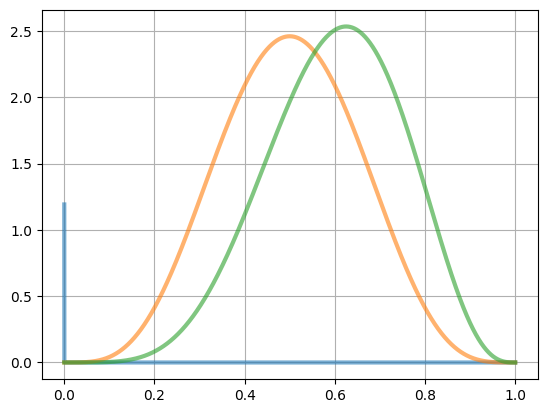

In [29]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.0, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * (mu + np.finfo(np.float32).eps)
    b = phi * (1 - mu - np.finfo(np.float32).eps)

    x = np.linspace(0, 1, 1000000)
    rvs = beta.rvs(a, b, size=1000)
    plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')

# plt.legend()
plt.grid()
plt.show()

In [30]:
beta.rvs(a, b)

0.6734570417504959

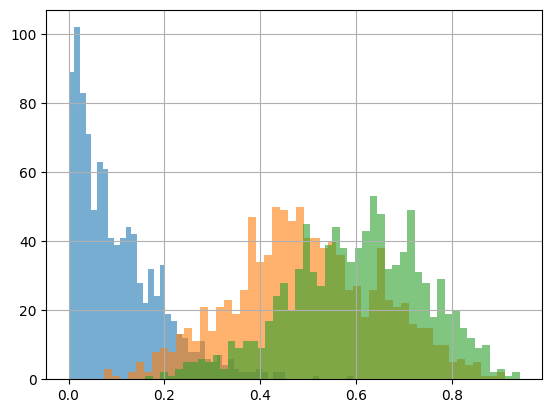

In [31]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.1, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * mu
    b = phi * (1 - mu)

    x = np.linspace(0, 1, 100)
    rvs = beta.rvs(a, b, size=1000)
    # plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')
    plt.hist(rvs, alpha=0.6, bins=50)

# plt.legend()
plt.grid()
plt.show()

## Instantiate model

In [32]:
# Constant params adjusted
model = ForagerModel()
ModelBuilder.add_random_resource(model)

In [33]:
for _ in range(1000):
    model.step()

[   0.   60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.
  720.  780.  840.  900.  960. 1020. 1080. 1140. 1200.]


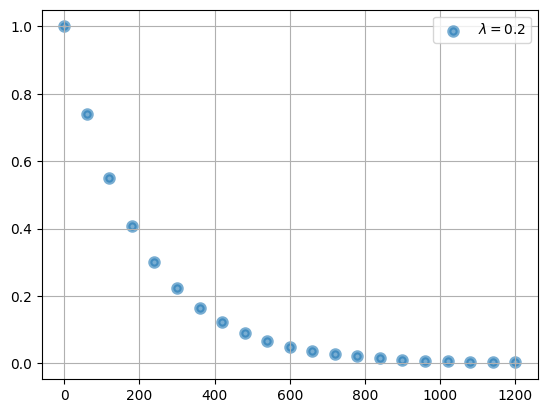

In [34]:
MINUTE = 60

max_ready_time = 20 * MINUTE
dt = MINUTE

dts = np.linspace(0, max_ready_time, max_ready_time // dt + 1)
print(dts)
plt.scatter(dts, expon.sf(dts, scale=2e2), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')

plt.legend()
plt.grid()
plt.show()

In [35]:
from time import time

start = time()

for _ in range(1):
    model.step()

end = time()

print(end - start)

0.0029888153076171875
